# Discrete Probability Distributions
Ref: https://www.countbayesie.com/blog/2015/3/17/interrogating-probability-distributions

Equation to obtain the discrete probability (dp) of having n values in k attempts

$dp$ $=$ $\binom{n}{k}$ $p^k(1-p)^{n-k}$

In [1]:
import math
import scipy

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from scipy import integrate
from scipy.stats import beta

Probability of having 10 tails is 0.028


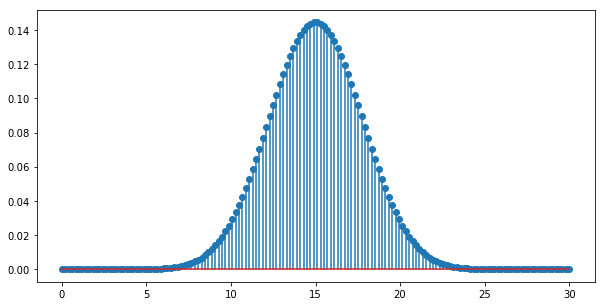

In [2]:
def scipyFactorial(k, n):
    return scipy.special.binom(k, n)

def probabilityMassFunction(n, k, p):
    heads = scipyFactorial(k,n)
    tails = math.pow(p, n) * math.pow(1-p, k-n)
    return heads * tails

n=10
k=30
p=0.5
print("Probability of having {} tails is {:0.3f}".format(n, probabilityMassFunction(n,k,p)))

# x = [i for i in range(k)]
x = np.linspace(0, k, 30*5)
y = [probabilityMassFunction(i,k,p) for i in x]

plt.figure(figsize=(10,5))
plt.stem(x, y, use_line_collection=True)
plt.show()

In [ ]:
first = 18
last = 25

def probabilityMassFunctionRange(first, last, k, p):
    values = [x for x in range(first,last, 1)]
    total = 0
    for i in values:
        total += probabilityMassFunction(i,k,p)
    return total

print("Probability of having between {} and {} tails (inclusive) is {:0.3f}".format(first, last, probabilityMassFunctionRange(first, last, k, p)))

Probability of having between 18 and 25 tails (inclusive) is 0.181


$Beta$($\alpha$,$\beta$) = $\frac{x^{\alpha - 1}(1-x)^{\beta -1}}{B(\alpha ,\beta)}$

In [ ]:
a, b = 11, 19
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
print("mean: {}, variance: {}, skew: {}, kurt: {}".format(mean, var, skew, kurt))

x = np.linspace(beta.ppf(0.0001, a, b),
                beta.ppf(0.9999, a, b), 100)

plt.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.5, label='beta pdf')

mean: 0.36666666666666664, variance: 0.007491039426523298, skew: 0.19256515705838026, kurt: -0.12788168769030014


## "What is the probability that ppp is between 0.2 and 0.5?"

In [ ]:
minimum = 0.2
maximum = 0.5

ii = integrate.quad(lambda x: beta.pdf(x, a, b), minimum, maximum)
print("What is the probability that p is between {} and {}?: {:0.3f}".format(minimum, maximum, ii[0]))